In [0]:
#################################

#Code for Alteryx

# List all non-standard packages to be imported by your 
# script here (only missing packages will be installed)
#from ayx import Package
#Package.installPackages(['pandas','numpy'])


#from ayx import Alteryx

#Alteryx.read("#1")
#data = Alteryx.read("#1")

In [0]:
#some libraries
%matplotlib inline
import pandas as pd
import numpy as np
from google.colab import files

In [21]:
# Get dataset
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Base-v1.csv", encoding='latin-1')
data.head()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Distribuidor,Territorio,#Sap,Cliente,Nombre Comercial,Nit,Fecha Alta,Count_Skus,Count_Categorias,Count_Marcas,Sum_Piezas,Sum_Cajas,Count,Region,Cod. Distribuido,Sum_GSV Local,Sum_GSV Euros,Sum_NIV EUROS - TMI ON,CountNonNull_TOP10,Sum_NIV LOCAL - TMI ON
0,CAMACHO FIERRO MARIO,907050,10000000,PLAN B,GRUPO PB SAS ...,901117319,NaN,2,2,2,8.0,2.000000,2,PITALITO,30506197.0,182207.84000,49.742790,46.758223,0,171275.369600
1,CAMACHO FIERRO MARIO,907050,10008087,PAKARII HOTEL,PAKARII HOTEL,1018406870,NaN,4,4,4,5.0,1.000000,4,PITALITO,30506197.0,91988.36051,25.112848,23.293784,2,85325.130859
2,CAMACHO FIERRO MARIO,907050,10008088,LA BICICLETA,LA BICICLETA,1123209938,NaN,5,5,5,7.0,0.916667,5,PITALITO,30506197.0,96662.79550,26.388970,24.805631,2,90863.027770
3,CAMACHO FIERRO MARIO,907050,10008089,LA PASADITA,LA PASADITA,1126448362,NaN,5,5,5,9.0,0.916667,5,PITALITO,30506197.0,92136.71500,25.153348,23.644147,2,86608.512100
4,CAMACHO FIERRO MARIO,907050,10008090,MISTER BURGUER,MISTER BURGUER,6803064,NaN,1,1,1,1.0,0.250000,1,PITALITO,30506197.0,22775.98000,6.217849,5.844778,0,21409.421200


In [22]:

from sklearn.cluster import KMeans

df = data[['Count_Skus', 'Count_Categorias', 'Count_Marcas',
       'Sum_Piezas', 'Sum_Cajas', 'Count', 'Sum_GSV Local', 'Sum_GSV Euros', 'Sum_NIV EUROS - TMI ON',
       'CountNonNull_TOP10', 'Sum_NIV LOCAL - TMI ON']]
df.head()




,Count_Skus,Count_Categorias,Count_Marcas,Sum_Piezas,Sum_Cajas,Count,Sum_GSV Local,Sum_GSV Euros,Sum_NIV EUROS - TMI ON,CountNonNull_TOP10,Sum_NIV LOCAL - TMI ON
0,2,2,2,8.0,2.000000,2,182207.84000,49.742790,46.758223,0,171275.369600
1,4,4,4,5.0,1.000000,4,91988.36051,25.112848,23.293784,2,85325.130859
2,5,5,5,7.0,0.916667,5,96662.79550,26.388970,24.805631,2,90863.027770
3,5,5,5,9.0,0.916667,5,92136.71500,25.153348,23.644147,2,86608.512100
4,1,1,1,1.0,0.250000,1,22775.98000,6.217849,5.844778,0,21409.421200


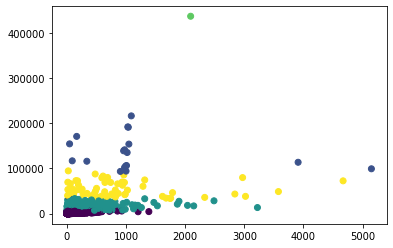

In [23]:
KM = KMeans(n_clusters=5, random_state=0).fit(df)

import matplotlib.pyplot as plt

plt.scatter(df['Count_Skus'], df['Sum_GSV Euros'], c=KM.labels_)




## Standarize data

Text(0, 0.5, 'GSV Euros')

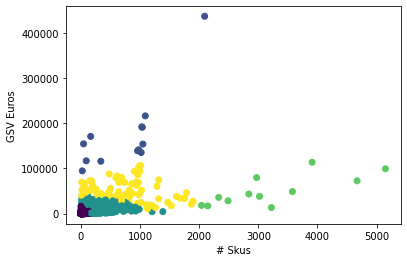

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
DF_std = ss.fit_transform(data[['Count_Skus', 'Count_Categorias', 'Count_Marcas',
       'Sum_Piezas', 'Sum_Cajas', 'Count', 'Sum_GSV Local', 'Sum_GSV Euros', 'Sum_NIV EUROS - TMI ON',
       'CountNonNull_TOP10', 'Sum_NIV LOCAL - TMI ON']].values)

KM_2 = KMeans(n_clusters=5, random_state=0).fit(DF_std)


plt.scatter(df['Count_Skus'], df['Sum_GSV Euros'], c=KM_2.labels_)
plt.xlabel("# Skus")
plt.ylabel("GSV Euros")




## Normalize data

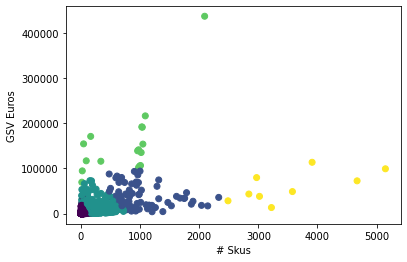

<Figure size 432x288 with 0 Axes>

In [25]:
from sklearn.preprocessing import MinMaxScaler
Mms = MinMaxScaler ()
X = data[['Count_Skus', 'Count_Categorias', 'Count_Marcas',
       'Sum_Piezas', 'Sum_Cajas', 'Count', 'Sum_GSV Local', 'Sum_GSV Euros', 'Sum_NIV EUROS - TMI ON',
       'CountNonNull_TOP10', 'Sum_NIV LOCAL - TMI ON']]
DF_nm = Mms.fit_transform(X)

KM_3 = KMeans(n_clusters=5, random_state=0).fit(DF_nm)

plt.scatter(X['Count_Skus'], X['Sum_GSV Euros'], c=KM_3.labels_)
plt.xlabel("# Skus")
plt.ylabel("GSV Euros")

test = plt.figure()
test.savefig('samplefigure.png')
#files.download('samplefigure.png')

import os    
local_download_path = os.path.expanduser('/content/gdrive/My Drive/Colab Notebooks/')
plot_filepath = os.path.join(local_download_path, "samplefigure.png")

plt.savefig(plot_filepath)

## StandarScaler

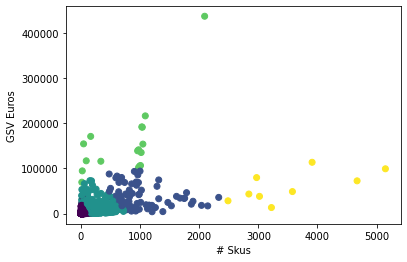

<Figure size 432x288 with 0 Axes>

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
DF_sc = Mms.fit_transform(X)

KM_4 = KMeans(n_clusters=5, random_state=0).fit(DF_sc)

plt.scatter(X['Count_Skus'], X['Sum_GSV Euros'], c=KM_4.labels_)
plt.xlabel("# Skus")
plt.ylabel("GSV Euros")

test = plt.figure()
test.savefig('samplefigure.png')


## 3D view

In [28]:
import plotly.express as px

fig = px.scatter_3d(X, x='Count_Skus', y='Sum_GSV Euros', z='CountNonNull_TOP10',
              color=KM_4.labels_)
fig.show()

### References

* https://community.alteryx.com/t5/Alteryx-Designer-Knowledge-Base/Tool-Mastery-Python/ta-p/197860
* https://scikit-learn.org/stable/modules/preprocessing.html
* https://medium.com/@stallonejacob/data-science-scaling-of-data-in-python-ec7ad220b339
* https://medium.com/@dey.mallika/unsupervised-learning-with-weighted-k-means-3828b708d75d
* https://seaborn.pydata.org/generated/seaborn.heatmap.html